Titanic Project

**Owner:** Mohit Kumar

**Mail ID:** mohitujjain71195@gmail.com

**Linkedin ID:** https://www.linkedin.com/in/mohit-kumar-61bb20198/

Data Description<a href="#Data-Description" class="anchor-link">¶</a>
=====================================================================

1.Survived : People can survive or not. 2.Pclass : This is types of
Ticket class ( 1 = 1st, 2 = 2nd, 3 = 3rd). 3.Sex : People are male or
women. 4.Age : Age of People. 5.Sibsp : How many siblings and spouses
aboard in the Titanic. 6.Parch : How many children and parents in the
Titanic. 7.Ticket : Numbers in a Ticket. 8.Fare : Passengers fare.
9.Cabin : Cabin number of passengers. 10.Embarked : Port of Embarkation
C = Cherbourg, Q = Queenstown, S =Southampton.

Loading all required packages<a href="#Loading-all-required-packages" class="anchor-link">¶</a>
===============================================================================================

In \[90\]:

    import pandas as pd
    import os as os
    import numpy as np

    #Visuals
    import matplotlib.pyplot as plt
    import seaborn as sns

    # To split data
    from sklearn.model_selection import train_test_split

    # Model Building
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier


    # Testing Model 
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix

    import warnings
    warnings.filterwarnings("ignore")

In \[92\]:

    filepath = "C:\\Users\\omsin\\Downloads"
    filename = "train (3).csv"

    data = pd.read_csv(os.path.join(filepath,filename))

In \[93\]:

    data.head()

Out\[93\]:

|     | PassengerId | Survived | Pclass | Name                                              | Sex    | Age  | SibSp | Parch | Ticket           | Fare    | Cabin | Embarked |
|-----|-------------|----------|--------|---------------------------------------------------|--------|------|-------|-------|------------------|---------|-------|----------|
| 0   | 1           | 0        | 3      | Braund, Mr. Owen Harris                           | male   | 22.0 | 1     | 0     | A/5 21171        | 7.2500  | NaN   | S        |
| 1   | 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | female | 38.0 | 1     | 0     | PC 17599         | 71.2833 | C85   | C        |
| 2   | 3           | 1        | 3      | Heikkinen, Miss. Laina                            | female | 26.0 | 0     | 0     | STON/O2. 3101282 | 7.9250  | NaN   | S        |
| 3   | 4           | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | female | 35.0 | 1     | 0     | 113803           | 53.1000 | C123  | S        |
| 4   | 5           | 0        | 3      | Allen, Mr. William Henry                          | male   | 35.0 | 0     | 0     | 373450           | 8.0500  | NaN   | S        |

In \[94\]:

    data.columns

Out\[94\]:

    Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
           'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
          dtype='object')

In \[95\]:

    data.shape

Out\[95\]:

    (891, 12)

In \[96\]:

    data.describe()

Out\[96\]:

|       | PassengerId | Survived   | Pclass     | Age        | SibSp      | Parch      | Fare       |
|-------|-------------|------------|------------|------------|------------|------------|------------|
| count | 891.000000  | 891.000000 | 891.000000 | 714.000000 | 891.000000 | 891.000000 | 891.000000 |
| mean  | 446.000000  | 0.383838   | 2.308642   | 29.699118  | 0.523008   | 0.381594   | 32.204208  |
| std   | 257.353842  | 0.486592   | 0.836071   | 14.526497  | 1.102743   | 0.806057   | 49.693429  |
| min   | 1.000000    | 0.000000   | 1.000000   | 0.420000   | 0.000000   | 0.000000   | 0.000000   |
| 25%   | 223.500000  | 0.000000   | 2.000000   | 20.125000  | 0.000000   | 0.000000   | 7.910400   |
| 50%   | 446.000000  | 0.000000   | 3.000000   | 28.000000  | 0.000000   | 0.000000   | 14.454200  |
| 75%   | 668.500000  | 1.000000   | 3.000000   | 38.000000  | 1.000000   | 0.000000   | 31.000000  |
| max   | 891.000000  | 1.000000   | 3.000000   | 80.000000  | 8.000000   | 6.000000   | 512.329200 |

In \[97\]:

    data.describe(include="all")

Out\[97\]:

|        | PassengerId | Survived   | Pclass     | Name                               | Sex  | Age        | SibSp      | Parch      | Ticket | Fare       | Cabin       | Embarked |
|--------|-------------|------------|------------|------------------------------------|------|------------|------------|------------|--------|------------|-------------|----------|
| count  | 891.000000  | 891.000000 | 891.000000 | 891                                | 891  | 714.000000 | 891.000000 | 891.000000 | 891    | 891.000000 | 204         | 889      |
| unique | NaN         | NaN        | NaN        | 891                                | 2    | NaN        | NaN        | NaN        | 681    | NaN        | 147         | 3        |
| top    | NaN         | NaN        | NaN        | Goodwin, Master. William Frederick | male | NaN        | NaN        | NaN        | 347082 | NaN        | C23 C25 C27 | S        |
| freq   | NaN         | NaN        | NaN        | 1                                  | 577  | NaN        | NaN        | NaN        | 7      | NaN        | 4           | 644      |
| mean   | 446.000000  | 0.383838   | 2.308642   | NaN                                | NaN  | 29.699118  | 0.523008   | 0.381594   | NaN    | 32.204208  | NaN         | NaN      |
| std    | 257.353842  | 0.486592   | 0.836071   | NaN                                | NaN  | 14.526497  | 1.102743   | 0.806057   | NaN    | 49.693429  | NaN         | NaN      |
| min    | 1.000000    | 0.000000   | 1.000000   | NaN                                | NaN  | 0.420000   | 0.000000   | 0.000000   | NaN    | 0.000000   | NaN         | NaN      |
| 25%    | 223.500000  | 0.000000   | 2.000000   | NaN                                | NaN  | 20.125000  | 0.000000   | 0.000000   | NaN    | 7.910400   | NaN         | NaN      |
| 50%    | 446.000000  | 0.000000   | 3.000000   | NaN                                | NaN  | 28.000000  | 0.000000   | 0.000000   | NaN    | 14.454200  | NaN         | NaN      |
| 75%    | 668.500000  | 1.000000   | 3.000000   | NaN                                | NaN  | 38.000000  | 1.000000   | 0.000000   | NaN    | 31.000000  | NaN         | NaN      |
| max    | 891.000000  | 1.000000   | 3.000000   | NaN                                | NaN  | 80.000000  | 8.000000   | 6.000000   | NaN    | 512.329200 | NaN         | NaN      |

In \[98\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 891 entries, 0 to 890
    Data columns (total 12 columns):
    PassengerId    891 non-null int64
    Survived       891 non-null int64
    Pclass         891 non-null int64
    Name           891 non-null object
    Sex            891 non-null object
    Age            714 non-null float64
    SibSp          891 non-null int64
    Parch          891 non-null int64
    Ticket         891 non-null object
    Fare           891 non-null float64
    Cabin          204 non-null object
    Embarked       889 non-null object
    dtypes: float64(2), int64(5), object(5)
    memory usage: 83.6+ KB

Remove Unwanted Columns<a href="#Remove-Unwanted-Columns" class="anchor-link">¶</a>
===================================================================================

In \[99\]:

    data = data.drop(["PassengerId"], axis = 1)
    data.head()

Out\[99\]:

|     | Survived | Pclass | Name                                              | Sex    | Age  | SibSp | Parch | Ticket           | Fare    | Cabin | Embarked |
|-----|----------|--------|---------------------------------------------------|--------|------|-------|-------|------------------|---------|-------|----------|
| 0   | 0        | 3      | Braund, Mr. Owen Harris                           | male   | 22.0 | 1     | 0     | A/5 21171        | 7.2500  | NaN   | S        |
| 1   | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | female | 38.0 | 1     | 0     | PC 17599         | 71.2833 | C85   | C        |
| 2   | 1        | 3      | Heikkinen, Miss. Laina                            | female | 26.0 | 0     | 0     | STON/O2. 3101282 | 7.9250  | NaN   | S        |
| 3   | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | female | 35.0 | 1     | 0     | 113803           | 53.1000 | C123  | S        |
| 4   | 0        | 3      | Allen, Mr. William Henry                          | male   | 35.0 | 0     | 0     | 373450           | 8.0500  | NaN   | S        |

In \[100\]:

    data.nunique()

Out\[100\]:

    Survived      2
    Pclass        3
    Name        891
    Sex           2
    Age          88
    SibSp         7
    Parch         7
    Ticket      681
    Fare        248
    Cabin       147
    Embarked      3
    dtype: int64

Checking for missing data<a href="#Checking--for-missing-data" class="anchor-link">¶</a>
========================================================================================

In \[101\]:

    data.isnull().sum()  # Missing values

Out\[101\]:

    Survived      0
    Pclass        0
    Name          0
    Sex           0
    Age         177
    SibSp         0
    Parch         0
    Ticket        0
    Fare          0
    Cabin       687
    Embarked      2
    dtype: int64

In \[102\]:

    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    missing_data.head(3)

Out\[102\]:

|          | Total | %    |
|----------|-------|------|
| Cabin    | 687   | 77.1 |
| Age      | 177   | 19.9 |
| Embarked | 2     | 0.2  |

As we can see from the above table that Cabin, Age and Embarked are the
only variables where there is any missing data

This is visualised in below plot

In \[103\]:

    sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Out\[103\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1bab9c70be0>

![](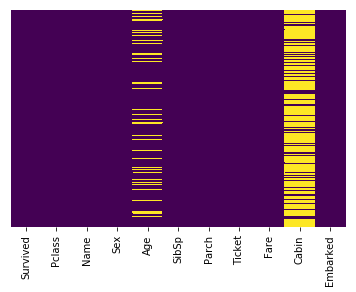%0A)

In \[104\]:

    sns.countplot(x='Survived',data=data,palette='hls')

Out\[104\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1babb322d68>

![](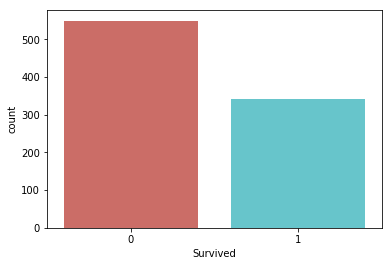%0A)

In \[105\]:

    g = sns.catplot(x='Pclass', hue='Sex', col='Survived',data=data, kind='count',height=4, aspect=.7)

![](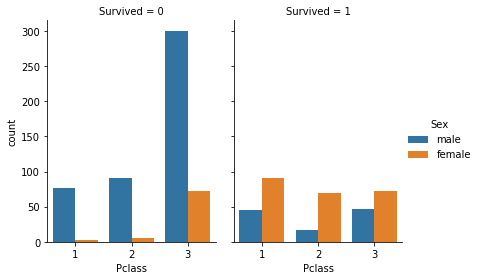%0A)

> Data indicates that of those who survived, survivors were
> predominantly females across all the classes. Those who perished were
> predominantly males across all the classes barring 3rd Class, where
> there was significant number of fatalities for female though the same
> among males was much higher.

In \[106\]:

    ax = sns.countplot(x='Pclass', hue='Sex', data=data)

![](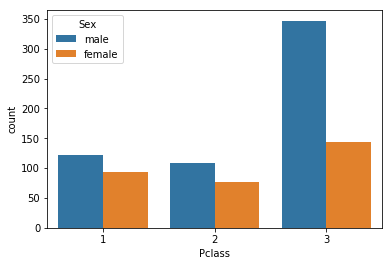%0A)

> Indicating the ratio of males compared to females across three
> classes. Ratio of males to females is only slightly higher for all
> classes, barring the 3rd Class where the ratio of males is
> significantly higher.

In \[107\]:

    FacetGrid = sns.FacetGrid(data, row='Embarked', size=4.5, aspect=1.6)
    FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
    FacetGrid.add_legend()

Out\[107\]:

    <seaborn.axisgrid.FacetGrid at 0x1bab9f46240>

![](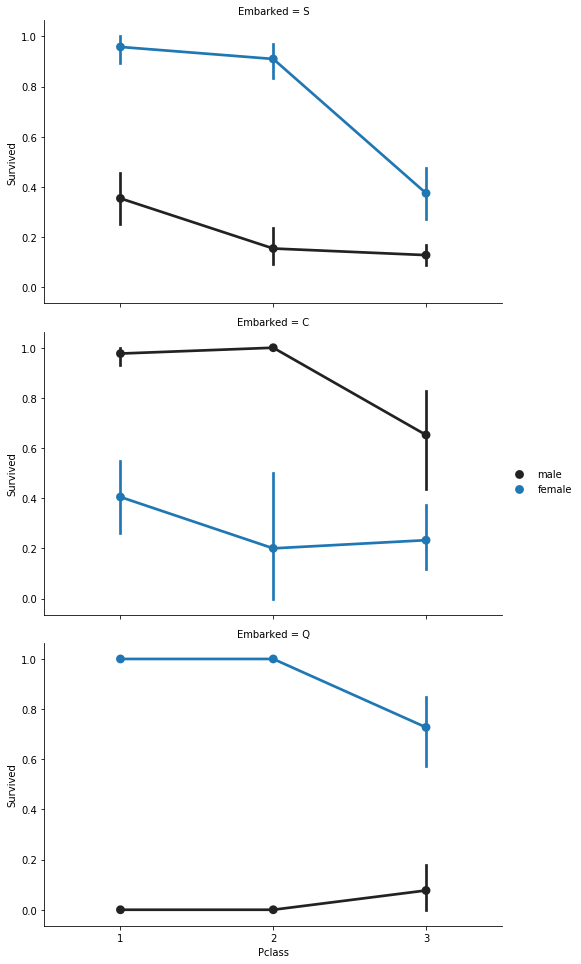%0A)

Embarked seems to be correlated with survival, depending on the gender.

Women who embarked at Q and port S have a higher chance of survival. The
inverse is true, if they embarked at port C. Men have a high survival
probability if they are on port C, but a low probability if they are on
port Q or S.

In \[108\]:

    sns.barplot(x='Pclass', y='Survived', data=data)

Out\[108\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1bab9f46780>

![](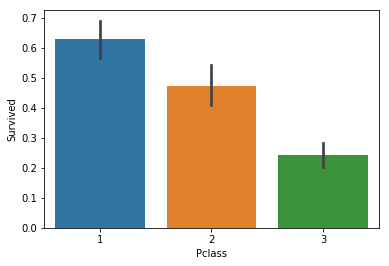%0A)

Here we see clearly, that Pclass is contributing to a persons chance of
survival, especially if this person is in class 1. We will create
another pclass plot below.

In \[109\]:

    grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=5, aspect=2)
    grid.map(plt.hist, 'Age', alpha=.5, bins=20)
    grid.add_legend();

![](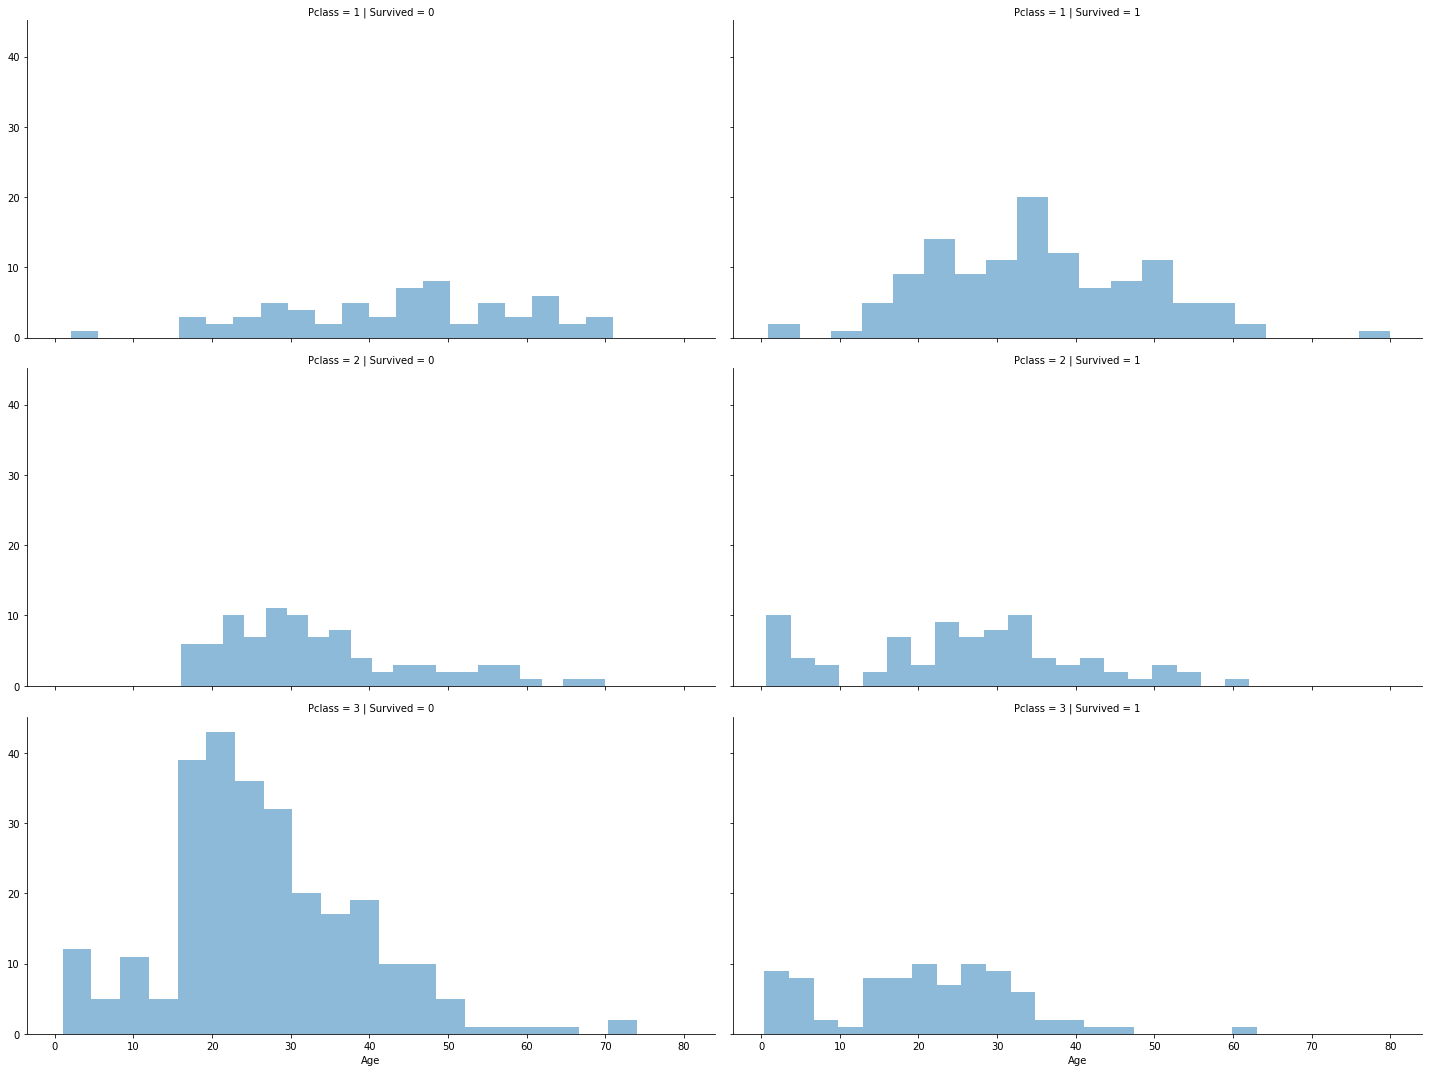%0A)

The plot above confirms our assumption about pclass 1, but we can also
spot a high probability that a person in pclass 3 will not survive.

SibSp and Parch would make more sense as a combined feature that shows
the total number of relatives, a person has on the Titanic.

In \[110\]:

    data['relatives'] = data['SibSp'] + data['Parch']
    data.loc[data['relatives'] > 0, 'not_alone'] = 0
    data.loc[data['relatives'] == 0, 'not_alone'] = 1
    data['not_alone'] = data['not_alone'].astype(int)
    data['not_alone'].value_counts()

Out\[110\]:

    1    537
    0    354
    Name: not_alone, dtype: int64

In \[111\]:

    axes = sns.factorplot('relatives','Survived', 
                          data = data, aspect = 2.5, )

![](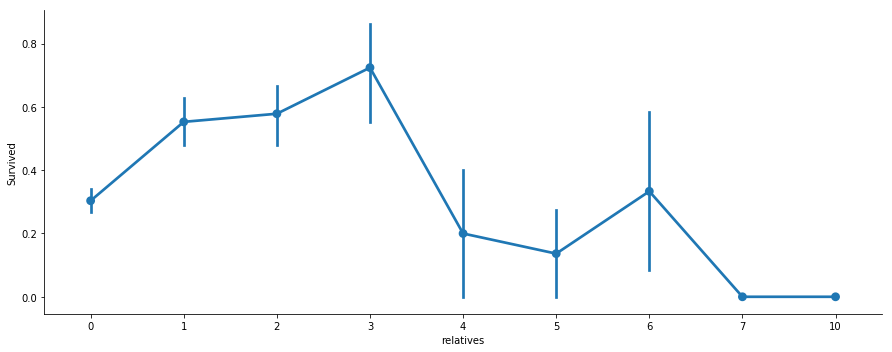%0A)

Here we can see that you had a high probabilty of survival with 1 to 3
realitves, but a lower one if you had less than 1 or more than 3 (except
for some cases with 6 relatives).

In \[112\]:

    data['Embarked'].mode()

Out\[112\]:

    0    S
    dtype: object

In \[113\]:

    #data['Embarked'][data['Embarked'].isna()==True]=data['Embarked'].mode()
    data['Embarked'][data['Embarked'].isna()==True]='S' #Since above command didnt work, manually imputed value as 'S'

Replacing the two missing values in Embarked with mode

In \[114\]:

    data['Embarked'].value_counts()

Out\[114\]:

    S    646
    C    168
    Q     77
    Name: Embarked, dtype: int64

In \[115\]:

    data['Embarked'].value_counts().sum()

Out\[115\]:

    891

Missing values imputed for Embarked

Since Ticket is unique identifiers, we will drop it from the dataset.
Model might also consider PassengerId to be a variable so we will drop
it from the dataset as well. Since Cabin has a lot of missing values, we
will drop that from the dataset too.

In \[116\]:

    data = data.drop([ 'Ticket','Cabin'], axis=1)

In \[117\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 891 entries, 0 to 890
    Data columns (total 11 columns):
    Survived     891 non-null int64
    Pclass       891 non-null int64
    Name         891 non-null object
    Sex          891 non-null object
    Age          714 non-null float64
    SibSp        891 non-null int64
    Parch        891 non-null int64
    Fare         891 non-null float64
    Embarked     891 non-null object
    relatives    891 non-null int64
    not_alone    891 non-null int32
    dtypes: float64(2), int32(1), int64(5), object(3)
    memory usage: 73.2+ KB

Missing values in Age are yet to be imputed

In \[118\]:

    sns.boxplot(x='Pclass',y='Age',data=data,palette='hls')

Out\[118\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1bab9116278>

![](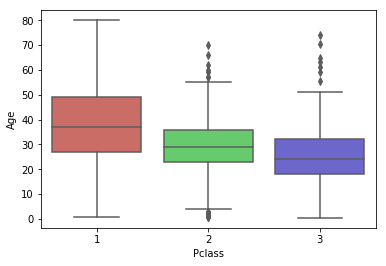%0A)

Looking at the distribution of the Age of passengers by class.

You can also see the mean Age of the passengers by Class based on
weather they survived or not.

In \[119\]:

    print(np.mean(data.Age[(data.Pclass==1)&(data.Survived==0)]))
    print(np.mean(data.Age[(data.Pclass==2)&(data.Survived==0)]))
    print(np.mean(data.Age[(data.Pclass==3)&(data.Survived==0)]))
    print(np.mean(data.Age[(data.Pclass==1)&(data.Survived==1)]))
    print(np.mean(data.Age[(data.Pclass==2)&(data.Survived==1)]))
    print(np.mean(data.Age[(data.Pclass==3)&(data.Survived==1)]))

    43.6953125
    33.544444444444444
    26.555555555555557
    35.36819672131148
    25.90156626506024
    20.646117647058823

Looking at the Age distribution of passengers survived vs not survived
by Sex

In \[120\]:

    survived = 'survived'
    not_survived = 'not survived'
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
    women = data[data['Sex']=='female']
    men = data[data['Sex']=='male']
    ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
    ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
    ax.legend()
    ax.set_title('Female')
    ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
    ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
    ax.legend()
    _ = ax.set_title('Male')

![](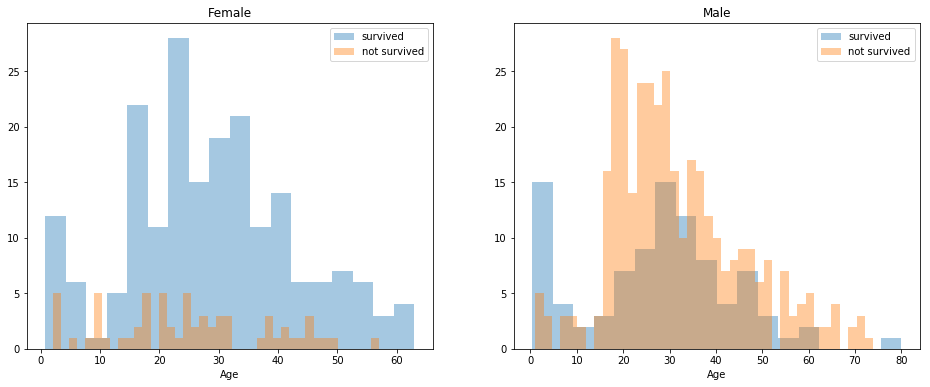%0A)

In \[121\]:

    data

Out\[121\]:

|     | Survived | Pclass | Name                                              | Sex    | Age  | SibSp | Parch | Fare     | Embarked | relatives | not\_alone |
|-----|----------|--------|---------------------------------------------------|--------|------|-------|-------|----------|----------|-----------|------------|
| 0   | 0        | 3      | Braund, Mr. Owen Harris                           | male   | 22.0 | 1     | 0     | 7.2500   | S        | 1         | 0          |
| 1   | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | female | 38.0 | 1     | 0     | 71.2833  | C        | 1         | 0          |
| 2   | 1        | 3      | Heikkinen, Miss. Laina                            | female | 26.0 | 0     | 0     | 7.9250   | S        | 0         | 1          |
| 3   | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | female | 35.0 | 1     | 0     | 53.1000  | S        | 1         | 0          |
| 4   | 0        | 3      | Allen, Mr. William Henry                          | male   | 35.0 | 0     | 0     | 8.0500   | S        | 0         | 1          |
| 5   | 0        | 3      | Moran, Mr. James                                  | male   | NaN  | 0     | 0     | 8.4583   | Q        | 0         | 1          |
| 6   | 0        | 1      | McCarthy, Mr. Timothy J                           | male   | 54.0 | 0     | 0     | 51.8625  | S        | 0         | 1          |
| 7   | 0        | 3      | Palsson, Master. Gosta Leonard                    | male   | 2.0  | 3     | 1     | 21.0750  | S        | 4         | 0          |
| 8   | 1        | 3      | Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) | female | 27.0 | 0     | 2     | 11.1333  | S        | 2         | 0          |
| 9   | 1        | 2      | Nasser, Mrs. Nicholas (Adele Achem)               | female | 14.0 | 1     | 0     | 30.0708  | C        | 1         | 0          |
| 10  | 1        | 3      | Sandstrom, Miss. Marguerite Rut                   | female | 4.0  | 1     | 1     | 16.7000  | S        | 2         | 0          |
| 11  | 1        | 1      | Bonnell, Miss. Elizabeth                          | female | 58.0 | 0     | 0     | 26.5500  | S        | 0         | 1          |
| 12  | 0        | 3      | Saundercock, Mr. William Henry                    | male   | 20.0 | 0     | 0     | 8.0500   | S        | 0         | 1          |
| 13  | 0        | 3      | Andersson, Mr. Anders Johan                       | male   | 39.0 | 1     | 5     | 31.2750  | S        | 6         | 0          |
| 14  | 0        | 3      | Vestrom, Miss. Hulda Amanda Adolfina              | female | 14.0 | 0     | 0     | 7.8542   | S        | 0         | 1          |
| 15  | 1        | 2      | Hewlett, Mrs. (Mary D Kingcome)                   | female | 55.0 | 0     | 0     | 16.0000  | S        | 0         | 1          |
| 16  | 0        | 3      | Rice, Master. Eugene                              | male   | 2.0  | 4     | 1     | 29.1250  | Q        | 5         | 0          |
| 17  | 1        | 2      | Williams, Mr. Charles Eugene                      | male   | NaN  | 0     | 0     | 13.0000  | S        | 0         | 1          |
| 18  | 0        | 3      | Vander Planke, Mrs. Julius (Emelia Maria Vande... | female | 31.0 | 1     | 0     | 18.0000  | S        | 1         | 0          |
| 19  | 1        | 3      | Masselmani, Mrs. Fatima                           | female | NaN  | 0     | 0     | 7.2250   | C        | 0         | 1          |
| 20  | 0        | 2      | Fynney, Mr. Joseph J                              | male   | 35.0 | 0     | 0     | 26.0000  | S        | 0         | 1          |
| 21  | 1        | 2      | Beesley, Mr. Lawrence                             | male   | 34.0 | 0     | 0     | 13.0000  | S        | 0         | 1          |
| 22  | 1        | 3      | McGowan, Miss. Anna "Annie"                       | female | 15.0 | 0     | 0     | 8.0292   | Q        | 0         | 1          |
| 23  | 1        | 1      | Sloper, Mr. William Thompson                      | male   | 28.0 | 0     | 0     | 35.5000  | S        | 0         | 1          |
| 24  | 0        | 3      | Palsson, Miss. Torborg Danira                     | female | 8.0  | 3     | 1     | 21.0750  | S        | 4         | 0          |
| 25  | 1        | 3      | Asplund, Mrs. Carl Oscar (Selma Augusta Emilia... | female | 38.0 | 1     | 5     | 31.3875  | S        | 6         | 0          |
| 26  | 0        | 3      | Emir, Mr. Farred Chehab                           | male   | NaN  | 0     | 0     | 7.2250   | C        | 0         | 1          |
| 27  | 0        | 1      | Fortune, Mr. Charles Alexander                    | male   | 19.0 | 3     | 2     | 263.0000 | S        | 5         | 0          |
| 28  | 1        | 3      | O'Dwyer, Miss. Ellen "Nellie"                     | female | NaN  | 0     | 0     | 7.8792   | Q        | 0         | 1          |
| 29  | 0        | 3      | Todoroff, Mr. Lalio                               | male   | NaN  | 0     | 0     | 7.8958   | S        | 0         | 1          |
| ... | ...      | ...    | ...                                               | ...    | ...  | ...   | ...   | ...      | ...      | ...       | ...        |
| 861 | 0        | 2      | Giles, Mr. Frederick Edward                       | male   | 21.0 | 1     | 0     | 11.5000  | S        | 1         | 0          |
| 862 | 1        | 1      | Swift, Mrs. Frederick Joel (Margaret Welles Ba... | female | 48.0 | 0     | 0     | 25.9292  | S        | 0         | 1          |
| 863 | 0        | 3      | Sage, Miss. Dorothy Edith "Dolly"                 | female | NaN  | 8     | 2     | 69.5500  | S        | 10        | 0          |
| 864 | 0        | 2      | Gill, Mr. John William                            | male   | 24.0 | 0     | 0     | 13.0000  | S        | 0         | 1          |
| 865 | 1        | 2      | Bystrom, Mrs. (Karolina)                          | female | 42.0 | 0     | 0     | 13.0000  | S        | 0         | 1          |
| 866 | 1        | 2      | Duran y More, Miss. Asuncion                      | female | 27.0 | 1     | 0     | 13.8583  | C        | 1         | 0          |
| 867 | 0        | 1      | Roebling, Mr. Washington Augustus II              | male   | 31.0 | 0     | 0     | 50.4958  | S        | 0         | 1          |
| 868 | 0        | 3      | van Melkebeke, Mr. Philemon                       | male   | NaN  | 0     | 0     | 9.5000   | S        | 0         | 1          |
| 869 | 1        | 3      | Johnson, Master. Harold Theodor                   | male   | 4.0  | 1     | 1     | 11.1333  | S        | 2         | 0          |
| 870 | 0        | 3      | Balkic, Mr. Cerin                                 | male   | 26.0 | 0     | 0     | 7.8958   | S        | 0         | 1          |
| 871 | 1        | 1      | Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  | female | 47.0 | 1     | 1     | 52.5542  | S        | 2         | 0          |
| 872 | 0        | 1      | Carlsson, Mr. Frans Olof                          | male   | 33.0 | 0     | 0     | 5.0000   | S        | 0         | 1          |
| 873 | 0        | 3      | Vander Cruyssen, Mr. Victor                       | male   | 47.0 | 0     | 0     | 9.0000   | S        | 0         | 1          |
| 874 | 1        | 2      | Abelson, Mrs. Samuel (Hannah Wizosky)             | female | 28.0 | 1     | 0     | 24.0000  | C        | 1         | 0          |
| 875 | 1        | 3      | Najib, Miss. Adele Kiamie "Jane"                  | female | 15.0 | 0     | 0     | 7.2250   | C        | 0         | 1          |
| 876 | 0        | 3      | Gustafsson, Mr. Alfred Ossian                     | male   | 20.0 | 0     | 0     | 9.8458   | S        | 0         | 1          |
| 877 | 0        | 3      | Petroff, Mr. Nedelio                              | male   | 19.0 | 0     | 0     | 7.8958   | S        | 0         | 1          |
| 878 | 0        | 3      | Laleff, Mr. Kristo                                | male   | NaN  | 0     | 0     | 7.8958   | S        | 0         | 1          |
| 879 | 1        | 1      | Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)     | female | 56.0 | 0     | 1     | 83.1583  | C        | 1         | 0          |
| 880 | 1        | 2      | Shelley, Mrs. William (Imanita Parrish Hall)      | female | 25.0 | 0     | 1     | 26.0000  | S        | 1         | 0          |
| 881 | 0        | 3      | Markun, Mr. Johann                                | male   | 33.0 | 0     | 0     | 7.8958   | S        | 0         | 1          |
| 882 | 0        | 3      | Dahlberg, Miss. Gerda Ulrika                      | female | 22.0 | 0     | 0     | 10.5167  | S        | 0         | 1          |
| 883 | 0        | 2      | Banfield, Mr. Frederick James                     | male   | 28.0 | 0     | 0     | 10.5000  | S        | 0         | 1          |
| 884 | 0        | 3      | Sutehall, Mr. Henry Jr                            | male   | 25.0 | 0     | 0     | 7.0500   | S        | 0         | 1          |
| 885 | 0        | 3      | Rice, Mrs. William (Margaret Norton)              | female | 39.0 | 0     | 5     | 29.1250  | Q        | 5         | 0          |
| 886 | 0        | 2      | Montvila, Rev. Juozas                             | male   | 27.0 | 0     | 0     | 13.0000  | S        | 0         | 1          |
| 887 | 1        | 1      | Graham, Miss. Margaret Edith                      | female | 19.0 | 0     | 0     | 30.0000  | S        | 0         | 1          |
| 888 | 0        | 3      | Johnston, Miss. Catherine Helen "Carrie"          | female | NaN  | 1     | 2     | 23.4500  | S        | 3         | 0          |
| 889 | 1        | 1      | Behr, Mr. Karl Howell                             | male   | 26.0 | 0     | 0     | 30.0000  | C        | 0         | 1          |
| 890 | 0        | 3      | Dooley, Mr. Patrick                               | male   | 32.0 | 0     | 0     | 7.7500   | Q        | 0         | 1          |

891 rows × 11 columns

In \[122\]:

    mean = data["Age"].mean()
    std = data["Age"].std()
    is_null = data["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = data["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data["Age"] = age_slice
    data["Age"] = data["Age"].astype(int)
    data["Age"].isnull().sum()

Out\[122\]:

    0

Changing the Sex to binary

In \[123\]:

    genders = {"male": 1, "female": 0}
    data['Sex'] = data['Sex'].map(genders)
    data.head()

Out\[123\]:

|     | Survived | Pclass | Name                                              | Sex | Age | SibSp | Parch | Fare    | Embarked | relatives | not\_alone |
|-----|----------|--------|---------------------------------------------------|-----|-----|-------|-------|---------|----------|-----------|------------|
| 0   | 0        | 3      | Braund, Mr. Owen Harris                           | 1   | 22  | 1     | 0     | 7.2500  | S        | 1         | 0          |
| 1   | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | 0   | 38  | 1     | 0     | 71.2833 | C        | 1         | 0          |
| 2   | 1        | 3      | Heikkinen, Miss. Laina                            | 0   | 26  | 0     | 0     | 7.9250  | S        | 0         | 1          |
| 3   | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | 0   | 35  | 1     | 0     | 53.1000 | S        | 1         | 0          |
| 4   | 0        | 3      | Allen, Mr. William Henry                          | 1   | 35  | 0     | 0     | 8.0500  | S        | 0         | 1          |

Converting Embarked to numberic

In \[124\]:

    ports = {"S": 0, "C": 1, "Q": 2}
    data['Embarked'] = data['Embarked'].map(ports)

In \[125\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 891 entries, 0 to 890
    Data columns (total 11 columns):
    Survived     891 non-null int64
    Pclass       891 non-null int64
    Name         891 non-null object
    Sex          891 non-null int64
    Age          891 non-null int32
    SibSp        891 non-null int64
    Parch        891 non-null int64
    Fare         891 non-null float64
    Embarked     891 non-null int64
    relatives    891 non-null int64
    not_alone    891 non-null int32
    dtypes: float64(1), int32(2), int64(7), object(1)
    memory usage: 69.7+ KB

In \[126\]:

    data.head()

Out\[126\]:

|     | Survived | Pclass | Name                                              | Sex | Age | SibSp | Parch | Fare    | Embarked | relatives | not\_alone |
|-----|----------|--------|---------------------------------------------------|-----|-----|-------|-------|---------|----------|-----------|------------|
| 0   | 0        | 3      | Braund, Mr. Owen Harris                           | 1   | 22  | 1     | 0     | 7.2500  | 0        | 1         | 0          |
| 1   | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Th... | 0   | 38  | 1     | 0     | 71.2833 | 1        | 1         | 0          |
| 2   | 1        | 3      | Heikkinen, Miss. Laina                            | 0   | 26  | 0     | 0     | 7.9250  | 0        | 0         | 1          |
| 3   | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)      | 0   | 35  | 1     | 0     | 53.1000 | 0        | 1         | 0          |
| 4   | 0        | 3      | Allen, Mr. William Henry                          | 1   | 35  | 0     | 0     | 8.0500  | 0        | 0         | 1          |

Creating a new feature called Title and removing the Name variable.

In \[127\]:

    titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    data['Title'] = data['Title'].map(titles)
    # filling NaN with 0, to get safe
    data['Title'] = data['Title'].fillna(0)
    data = data.drop(['Name'], axis=1)

Grouping or Bucketing the fares paid by passengers<a href="#Grouping-or-Bucketing-the-fares-paid-by-passengers" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------------------------------------------

In \[128\]:

    data['Fare'] = data['Fare'].astype(int)
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[(data['Fare'] > 31) & (data['Fare'] <= 99), 'Fare']   = 3
    data.loc[(data['Fare'] > 99) & (data['Fare'] <= 250), 'Fare']   = 4
    data.loc[ data['Fare'] > 250, 'Fare'] = 5

### Looking at the correlation between various variables<a href="#Looking-at-the-correlation-between-various-variables" class="anchor-link">¶</a>

In \[129\]:

    data.corr()

Out\[129\]:

|            | Survived  | Pclass    | Sex       | Age       | SibSp     | Parch     | Fare      | Embarked  | relatives | not\_alone | Title     |
|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----------|
| Survived   | 1.000000  | -0.338481 | -0.543351 | -0.062335 | -0.035322 | 0.081629  | 0.312249  | 0.106811  | 0.016639  | -0.203367  | 0.407753  |
| Pclass     | -0.338481 | 1.000000  | 0.131900  | -0.332141 | 0.083081  | 0.018443  | -0.681035 | 0.045702  | 0.065997  | 0.135207   | -0.173929 |
| Sex        | -0.543351 | 0.131900  | 1.000000  | 0.073655  | -0.114631 | -0.245489 | -0.245782 | -0.116569 | -0.200988 | 0.303646   | -0.502713 |
| Age        | -0.062335 | -0.332141 | 0.073655  | 1.000000  | -0.221923 | -0.164647 | 0.102534  | -0.015373 | -0.233931 | 0.166578   | -0.083338 |
| SibSp      | -0.035322 | 0.083081  | -0.114631 | -0.221923 | 1.000000  | 0.414838  | 0.342377  | -0.059961 | 0.890712  | -0.584471  | 0.269623  |
| Parch      | 0.081629  | 0.018443  | -0.245489 | -0.164647 | 0.414838  | 1.000000  | 0.369094  | -0.078665 | 0.783111  | -0.583398  | 0.315784  |
| Fare       | 0.312249  | -0.681035 | -0.245782 | 0.102534  | 0.342377  | 0.369094  | 1.000000  | -0.055693 | 0.418396  | -0.526320  | 0.313595  |
| Embarked   | 0.106811  | 0.045702  | -0.116569 | -0.015373 | -0.059961 | -0.078665 | -0.055693 | 1.000000  | -0.080281 | 0.017807   | 0.045400  |
| relatives  | 0.016639  | 0.065997  | -0.200988 | -0.233931 | 0.890712  | 0.783111  | 0.418396  | -0.080281 | 1.000000  | -0.690922  | 0.342039  |
| not\_alone | -0.203367 | 0.135207  | 0.303646  | 0.166578  | -0.584471 | -0.583398 | -0.526320 | 0.017807  | -0.690922 | 1.000000   | -0.405813 |
| Title      | 0.407753  | -0.173929 | -0.502713 | -0.083338 | 0.269623  | 0.315784  | 0.313595  | 0.045400  | 0.342039  | -0.405813  | 1.000000  |

In \[130\]:

    plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
    plt.show()

![](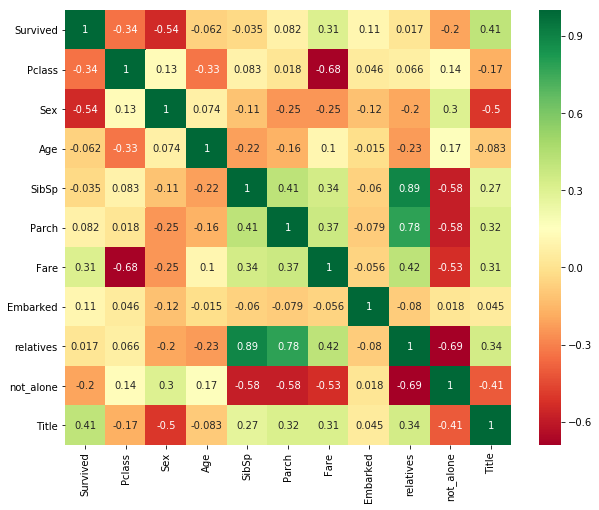%0A)

In \[131\]:

    data.head()

Out\[131\]:

|     | Survived | Pclass | Sex | Age | SibSp | Parch | Fare | Embarked | relatives | not\_alone | Title |
|-----|----------|--------|-----|-----|-------|-------|------|----------|-----------|------------|-------|
| 0   | 0        | 3      | 1   | 22  | 1     | 0     | 0    | 0        | 1         | 0          | 1     |
| 1   | 1        | 1      | 0   | 38  | 1     | 0     | 3    | 1        | 1         | 0          | 3     |
| 2   | 1        | 3      | 0   | 26  | 0     | 0     | 0    | 0        | 0         | 1          | 2     |
| 3   | 1        | 1      | 0   | 35  | 1     | 0     | 3    | 0        | 1         | 0          | 3     |
| 4   | 0        | 3      | 1   | 35  | 0     | 0     | 1    | 0        | 0         | 1          | 1     |

Building the Model<a href="#Building-the-Model" class="anchor-link">¶</a>
=========================================================================

In \[132\]:

    X = data.drop('Survived',axis=1)
    y = data['Survived']

In \[133\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Logistic Regression:<a href="#Logistic-Regression:" class="anchor-link">¶</a>
=============================================================================

In \[134\]:

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    Y_pred = logreg.predict(X_test)

    acc_log = round(logreg.score(X_train, y_train) * 100, 2)

K Nearest Neighbors:<a href="#K-Nearest-Neighbors:" class="anchor-link">¶</a>
=============================================================================

In \[135\]:

    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, y_train) * 100, 2)

Decision Tree:<a href="#Decision-Tree:" class="anchor-link">¶</a>
=================================================================

In \[136\]:

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    Y_pred = decision_tree.predict(X_test)
    acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

Random Forest:<a href="#Random-Forest:" class="anchor-link">¶</a>
=================================================================

In \[137\]:

    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, y_train)
    Y_pred = random_forest.predict(X_test)
    random_forest.score(X_train, y_train)
    acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

Comparing the models:<a href="#Comparing-the-models:" class="anchor-link">¶</a>
===============================================================================

In \[138\]:

    results = pd.DataFrame({
        'Model': ['Logistic Regression','KNN', 'Decision Tree', 'Random Forest'],
        'Score': [acc_log, acc_knn, acc_decision_tree, acc_random_forest]})
    result_data = results.sort_values(by='Score', ascending=False)
    result_data = result_data.set_index('Score')
    result_data.head()

Out\[138\]:

Model

Score

97.11

Decision Tree

97.11

Random Forest

87.32

KNN

79.61

Logistic Regression

Confusion Matrix:<a href="#Confusion-Matrix:" class="anchor-link">¶</a>
=======================================================================

In \[139\]:

    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix
    predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
    confusion_matrix(y_train, predictions)

Out\[139\]:

    array([[311,  60],
           [ 73, 179]], dtype=int64)

In \[140\]:

    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train, predictions).flatten()]
    percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, predictions).flatten()/np.sum(confusion_matrix(y_train, predictions))]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix(y_train, predictions), annot=labels, fmt='', cmap='Blues')

Out\[140\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1bab9773a90>

![](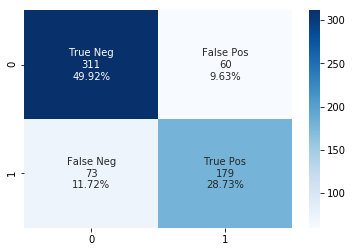%0A)

### First row talks about 306 passengers were correctly classified as not survived and 67 were wrongly classified as not survived<a href="#First-row-talks-about-306-passengers-were-correctly-classified-as-not-survived-and-67-were-wrongly-classified-as-not-survived" class="anchor-link">¶</a>

Second row talks about 70 passengers were wrongly classified as not
survived and 180 were correctly classified as survived

Precision and Recall:<a href="#Precision-and-Recall:" class="anchor-link">¶</a>
===============================================================================

In \[141\]:

    from sklearn.metrics import precision_score, recall_score

    print("Precision:", precision_score(y_train, predictions))
    print("Recall:",recall_score(y_train, predictions))

    Precision: 0.7489539748953975
    Recall: 0.7103174603174603

F-Score:<a href="#F-Score:" class="anchor-link">¶</a>
=====================================================

In \[142\]:

    from sklearn.metrics import f1_score
    f1_score(y_train, predictions)

Out\[142\]:

    0.7291242362525459

In \[ \]: